# Content:
### 1. Data ingestion configuration
### 2. Import Stock data 
- #### 2.1 Import predictor data from endpoint
    - 2.1.1 Technology
    - 2.1.2 Healthcare
    - 2.1.3 Finance
    - 2.1.4 Consumer Goods
    - 2.1.5 Industrials
- #### 2.2 Combine all stocks
- #### 2.3 Plot stocks
- #### 2.4 Lag of each stock
### 3. Import predictor data
- #### 3.1 Import predictor data from endpoint
    - daily federal funds rate
    - daily US treasury yield
    - monthly total nonfarm payroll
    - monthly unemployment rate
    - monthly consumer price index (CPI)
- #### 3.2 Clean predictor data
- #### 3.3 Plot predictors

# 1. Data ingestion configuration

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir(r'/Users/ruiyang/Desktop/CSC2516projectgit/ProjectBuffalo')
local_path = '/Users/ruiyang/Desktop/CSC2516projectgit/ProjectBuffalo'

In [3]:
import buffalo.ingestion as ingestion

In [4]:
ingestion.configuration.Configuration.print()

{'storage_folder': '../__cached_data', 'api_keys': {<API.ADVANTAGE: 1>: '2rrNROO0beX90lPH7ixQOp0mT_9SwF0d'}, 'watched_tickers': ['IBM', 'MSFT']}


In [5]:
advantage_endpoint = ingestion.advantage.AdvantageStockGrepper()

# 2. Import Stock data 
- #### 2.1 Import predictor data from endpoint
    - 2.1.1 Technology
    - 2.1.2 Healthcare
    - 2.1.3 Finance
    - 2.1.4 Consumer Goods
    - 2.1.5 Industrials
- #### 2.2 Combine all stocks
- #### 2.3 Plot stocks
- #### 2.4 Lag of each stock

We we import some representative US stock and ETF across different industries:

Technology:
* Apple Inc. (AAPL)
* Microsoft Corporation (MSFT)
* Amazon.com Inc. (AMZN)
* Alphabet Inc. (GOOGL)
* Technology Select Sector SPDR Fund (XLK)

Healthcare:
* Johnson & Johnson (JNJ)
* Pfizer Inc. (PFE)
* UnitedHealth Group Incorporated (UNH)
* Merck & Co., Inc. (MRK)
* Health Care Select Sector SPDR Fund (XLV)

Finance:
* JPMorgan Chase & Co. (JPM)
* Bank of America Corporation (BAC)
* Goldman Sachs Group Inc. (GS)
* Morgan Stanley (MS)
* Financial Select Sector SPDR Fund (XLF)

Consumer Goods:
* Procter & Gamble Company (PG)
* Coca-Cola Company (KO)
* PepsiCo, Inc. (PEP)
* Nike, Inc. (NKE)
* Consumer Staples Select Sector SPDR Fund (XLP)

Industrials:
* General Electric Company (GE)
* Honeywell International Inc. (HON)
* United Technologies Corporation (UTX)
* 3M Company (MMM)
* Industrial Select Sector SPDR Fund (XLI)

## 2.1 Import predictor data from endpoint

### 2.1.1 Technology:

In [6]:
tech = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'XLK']

tech_dfs = []  # Create an empty list to store the dataframes

for s in tech:
    # Download the data for the current stock and store it in a new dataframe
    df = advantage_endpoint.stock_download(
        symbol=s,
        interval='daily',
        year_slice=None,  # Intraday
        adjusted=True
    )
    # # save the DataFrame to a CSV file
    # df.to_csv(local_path + '/example/data/stock/' + s +'.csv', index=False)
    # Add the dataframe to the list
    tech_dfs.append(df)


In [7]:
tech_dfs[4]

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2023-03-10,138.00,138.35,135.230,135.77,135.770000,15277769,0.0,1.0
1,2023-03-09,140.43,142.01,137.930,138.20,138.200000,7812295,0.0,1.0
2,2023-03-08,139.55,140.38,138.730,140.21,140.210000,6623474,0.0,1.0
3,2023-03-07,140.70,141.24,138.710,139.06,139.060000,7060055,0.0,1.0
4,2023-03-06,141.04,142.72,140.695,140.81,140.810000,7999615,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5872,1999-11-05,44.25,44.25,43.470,43.67,33.108082,898000,0.0,1.0
5873,1999-11-04,43.44,43.47,42.910,43.20,32.751755,409100,0.0,1.0
5874,1999-11-03,42.88,43.13,42.630,42.88,32.509149,209200,0.0,1.0
5875,1999-11-02,42.44,42.94,42.140,42.25,32.031519,156300,0.0,1.0


In [8]:
# Concatenate dataframes along columns axis and set column names to be stock symbols
tech_adj_close = pd.concat([df.set_index('timestamp')['adjusted_close'] for df in tech_dfs], axis=1, keys=tech)
tech_adj_close

,AAPL,MSFT,AMZN,GOOGL,XLK
timestamp,,,,,
2023-03-10,148.500000,248.590000,90.7300,90.63,135.770000
2023-03-09,150.590000,252.320000,92.2500,92.32,138.200000
2023-03-08,152.870000,253.700000,93.9200,94.25,140.210000
2023-03-07,151.600000,254.150000,93.5500,93.86,139.060000
2023-03-06,153.830000,256.870000,93.7500,95.13,140.810000
...,...,...,...,...,...
1999-11-05,0.670165,28.620414,3.2470,NaN,33.108082
1999-11-04,0.634574,28.679806,3.1530,NaN,32.751755
1999-11-03,0.618485,28.757952,3.2905,NaN,32.509149


### 2.1.2 Healthcare:

In [9]:
health = ['JNJ', 'PFE', 'UNH', 'MARK', 'XLV']

health_dfs = []  # Create an empty list to store the dataframes

for s in health:
    # Download the data for the current stock and store it in a new dataframe
    df = advantage_endpoint.stock_download(
        symbol=s,
        interval='daily',
        year_slice=None,  # Intraday
        adjusted=True
    )
    # # save the DataFrame to a CSV file
    # df.to_csv(local_path + '/example/data/stock/' + s +'.csv', index=False)
    # Add the dataframe to the list
    health_dfs.append(df)

In [10]:
# Concatenate dataframes along columns axis and set column names to be stock symbols
health_adj_close = pd.concat([df.set_index('timestamp')['adjusted_close'] for df in health_dfs], axis=1, keys=health)
health_adj_close

,JNJ,PFE,UNH,MARK,XLV
timestamp,,,,,
2023-03-10,151.610000,39.390000,460.330000,1.12,124.150000
2023-03-09,151.240000,39.460000,464.910000,1.18,125.070000
2023-03-08,152.960000,40.120000,470.600000,1.25,126.350000
2023-03-07,154.090000,40.340000,473.880000,1.30,127.030000
2023-03-06,155.560000,41.110000,480.780000,1.38,129.110000
...,...,...,...,...,...
1999-11-05,29.147988,14.900787,5.382415,NaN,19.875858
1999-11-04,29.092731,15.972786,5.325068,NaN,19.967680
1999-11-03,28.816447,16.534513,5.421329,NaN,19.741657


### 2.1.3 Finance:

In [11]:
finance = ['JPM', 'BAC', 'GS', 'MS', 'XLF']

finance_dfs = []  # Create an empty list to store the dataframes

for s in finance:
    # Download the data for the current stock and store it in a new dataframe
    df = advantage_endpoint.stock_download(
        symbol=s,
        interval='daily',
        year_slice=None,  # Intraday
        adjusted=True
    )
    # # save the DataFrame to a CSV file
    # df.to_csv(local_path + '/example/data/stock/' + s +'.csv', index=False)
    # Add the dataframe to the list
    finance_dfs.append(df)

In [12]:
# Concatenate dataframes along columns axis and set column names to be stock symbols
finance_adj_close = pd.concat([df.set_index('timestamp')['adjusted_close'] for df in finance_dfs], axis=1, keys=finance)
finance_adj_close

,JPM,BAC,GS,MS,XLF
timestamp,,,,,
2023-03-10,133.650000,30.270000,327.670000,90.050000,32.930000
2023-03-09,130.340000,30.540000,342.090000,92.200000,33.540000
2023-03-08,137.800000,32.560000,349.290000,95.900000,34.960000
2023-03-07,138.620000,33.000000,346.080000,96.060000,35.090000
2023-03-06,142.820000,34.090000,357.050000,98.380000,36.020000
...,...,...,...,...,...
1999-11-05,28.160748,16.943264,54.882662,31.185917,13.230155
1999-11-04,27.465300,16.537001,52.231254,30.480390,12.915031
1999-11-03,26.916777,16.406788,51.203460,29.319770,12.762551


### 2.1.4 Consumer Goods:

In [13]:
consum = ['PG', 'KO', 'PEP', 'NKE', 'XLP']

consum_dfs = []  # Create an empty list to store the dataframes

for s in consum:
    # Download the data for the current stock and store it in a new dataframe
    df = advantage_endpoint.stock_download(
        symbol=s,
        interval='daily',
        year_slice=None,  # Intraday
        adjusted=True
    )
    # # save the DataFrame to a CSV file
    # df.to_csv(local_path + '/example/data/stock/' + s +'.csv', index=False)
    # Add the dataframe to the list
    consum_dfs.append(df)

In [14]:
# Concatenate dataframes along columns axis and set column names to be stock symbols
consum_adj_close = pd.concat([df.set_index('timestamp')['adjusted_close'] for df in consum_dfs], axis=1, keys=consum)
consum_adj_close

,PG,KO,PEP,NKE,XLP
timestamp,,,,,
2023-03-10,137.190000,59.210000,172.030000,117.490000,71.110000
2023-03-09,136.570000,59.460000,171.800000,117.870000,71.460000
2023-03-08,137.580000,60.040000,173.110000,119.860000,72.130000
2023-03-07,137.560000,60.010000,172.640000,119.590000,72.010000
2023-03-06,140.350000,60.360000,173.500000,120.170000,72.730000
...,...,...,...,...,...
1999-11-05,28.802499,15.450016,19.033832,4.483571,14.593798
1999-11-04,28.639312,15.067287,18.577831,4.711771,14.489100
1999-11-03,29.047280,15.117786,19.281537,4.694002,14.553082


### 2.1.5 Industrials:

In [15]:
indus = ['GE', 'HON', 'UTX', 'MMM', 'XLI']

indus_dfs = []  # Create an empty list to store the dataframes

for s in indus:
    # Download the data for the current stock and store it in a new dataframe
    df = advantage_endpoint.stock_download(
        symbol=s,
        interval='daily',
        year_slice=None,  # Intraday
        adjusted=True
    )
    # # save the DataFrame to a CSV file
    # df.to_csv(local_path + '/example/data/stock/' + s +'.csv', index=False)
    # Add the dataframe to the list
    indus_dfs.append(df)

In [16]:
# Concatenate dataframes along columns axis and set column names to be stock symbols
indus_adj_close = pd.concat([df.set_index('timestamp')['adjusted_close'] for df in indus_dfs], axis=1, keys=indus)
indus_adj_close

,GE,HON,UTX,MMM,XLI
timestamp,,,,,
2023-03-10,91.000000,193.330000,NaN,104.060000,99.000000
2023-03-09,91.560000,192.880000,95.930000,105.520000,100.880000
2023-03-08,86.980000,195.570000,97.400000,107.160000,102.390000
2023-03-07,86.390000,195.620000,98.180000,107.090000,102.150000
2023-03-06,87.060000,197.040000,99.510000,109.930000,103.480000
...,...,...,...,...,...
1999-11-05,147.080838,31.524989,8.512806,25.724341,17.905087
1999-11-04,145.024455,31.173578,8.645343,25.471641,17.807882
1999-11-03,144.474620,31.774378,9.084085,25.404433,17.859725


## 2.2 Combine all stocks

In [17]:
# specify the folder path where CSV files are located
stock_path = local_path + '/example/data/stock'

# get a list of all CSV files in the folder
stock_csv_files = [f for f in os.listdir(stock_path) if f.endswith('.csv')]

# create an empty list to store DataFrames
stock_dfs = []
stock_symbols = []

# loop through each CSV file, read it into a DataFrame, and append it to the list of DataFrames
for csv_file in stock_csv_files:
    csv_path = os.path.join(stock_path, csv_file)
    df = pd.read_csv(csv_path)
    stock_dfs.append(df)
    # extract file name
    base_name, extension = os.path.splitext(csv_file)
    stock_symbols.append(base_name)

In [29]:
# concatenate all DataFrames in the list into a single DataFrame
entire_adj_close = pd.concat([df.set_index('timestamp')['adjusted_close'] for df in stock_dfs], axis=1, keys=stock_symbols)
entire_adj_close

,MARK,UTX,BAC,PEP,PG,AMZN,XLF,MMM,XLP,KO,...,JPM,XLK,GOOGL,XLI,PFE,MS,UNH,HON,AAPL,JNJ
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-10,1.12,NaN,30.270000,172.030000,137.190000,90.7300,32.930000,104.060000,71.110000,59.210000,...,133.650000,135.770000,90.63,99.000000,39.390000,90.050000,460.330000,193.330000,148.500000,151.610000
2023-03-09,1.18,95.930000,30.540000,171.800000,136.570000,92.2500,33.540000,105.520000,71.460000,59.460000,...,130.340000,138.200000,92.32,100.880000,39.460000,92.200000,464.910000,192.880000,150.590000,151.240000
2023-03-08,1.25,97.400000,32.560000,173.110000,137.580000,93.9200,34.960000,107.160000,72.130000,60.040000,...,137.800000,140.210000,94.25,102.390000,40.120000,95.900000,470.600000,195.570000,152.870000,152.960000
2023-03-07,1.30,98.180000,33.000000,172.640000,137.560000,93.5500,35.090000,107.090000,72.010000,60.010000,...,138.620000,139.060000,93.86,102.150000,40.340000,96.060000,473.880000,195.620000,151.600000,154.090000
2023-03-06,1.38,99.510000,34.090000,173.500000,140.350000,93.7500,36.020000,109.930000,72.730000,60.360000,...,142.820000,140.810000,95.13,103.480000,41.110000,98.380000,480.780000,197.040000,153.830000,155.560000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-11-05,NaN,8.512806,16.943264,19.033832,28.802499,3.2470,13.230155,25.724341,14.593798,15.450016,...,28.160748,33.108082,NaN,17.905087,14.900787,31.185917,5.382415,31.524989,0.670165,29.147988
1999-11-04,NaN,8.645343,16.537001,18.577831,28.639312,3.1530,12.915031,25.471641,14.489100,15.067287,...,27.465300,32.751755,NaN,17.807882,15.972786,30.480390,5.325068,31.173578,0.634574,29.092731
1999-11-03,NaN,9.084085,16.406788,19.281537,29.047280,3.2905,12.762551,25.404433,14.553082,15.117786,...,26.916777,32.509149,NaN,17.859725,16.534513,29.319770,5.421329,31.774378,0.618485,28.816447


In [30]:
# Define the date range from 2013-03-01 to 2023-02-28
start_date = dt.date(2023, 2, 28) - dt.timedelta(days=10*365+1)
end_date = dt.date(2023, 2, 28)

# Generate a range of dates of last 10 years
dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame with the dates as the index
df_dates = pd.DataFrame({'timestamp':dates})
df_dates

,timestamp
0,2013-03-01
1,2013-03-02
2,2013-03-03
3,2013-03-04
4,2013-03-05
...,...
3647,2023-02-24
3648,2023-02-25
3649,2023-02-26
3650,2023-02-27


In [31]:
# convert the 'date' column to datetime64
entire_adj_close = entire_adj_close.reset_index()
entire_adj_close['timestamp'] = pd.to_datetime(entire_adj_close['timestamp'], format='%Y-%m-%d')
# Left join the predictor with df_dates
entire_adj_close = df_dates.merge(entire_adj_close, how='inner', on='timestamp').set_index('timestamp')
entire_adj_close

,MARK,UTX,BAC,PEP,PG,AMZN,XLF,MMM,XLP,KO,...,JPM,XLK,GOOGL,XLI,PFE,MS,UNH,HON,AAPL,JNJ
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-03-01,14.701,35.391712,9.584686,57.001824,57.078764,13.2870,11.834216,76.965168,29.382967,28.247030,...,37.035701,25.630404,20.217158,33.781366,18.137520,17.991470,45.922325,54.748702,13.259694,58.478397
2013-03-04,13.500,34.999038,9.643851,57.504803,57.220547,13.6555,11.934848,76.601740,29.605915,28.334618,...,37.179573,25.708124,20.601194,33.715290,18.336179,18.127830,45.750717,54.475154,12.938729,58.859612
2013-03-05,12.600,35.741191,9.762181,57.730018,57.496650,13.7795,12.035479,77.469517,29.705857,28.232432,...,37.474889,26.062183,21.030018,34.194341,18.587813,18.240126,45.905165,55.241088,13.280455,59.210330
2013-03-06,12.500,35.760825,10.074909,57.654946,57.608584,13.6895,12.115983,77.625272,29.636666,28.480597,...,37.883789,26.044912,20.848858,34.194341,18.620923,18.376486,45.999549,55.702212,13.111594,59.004474
2013-03-07,13.100,36.012137,10.362280,57.910190,57.384717,13.6940,12.203197,77.536269,29.636666,28.553587,...,38.338121,26.105361,20.879353,34.219119,18.720252,18.625142,46.162577,56.405622,13.263144,59.278949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,1.570,99.958243,34.066215,174.959124,140.500000,95.7900,35.600000,108.940000,73.290000,59.980000,...,138.560000,136.300000,91.650000,100.420000,42.380000,97.270000,488.890000,194.462942,148.910000,157.780000
2023-02-23,1.415,99.640000,34.036411,175.147872,140.050000,95.8200,35.630000,108.910000,73.200000,60.090000,...,139.670000,138.560000,90.890000,100.890000,42.300000,97.940000,491.690000,195.020000,149.400000,157.730000
2023-02-24,1.380,99.620000,33.986737,174.800179,139.260000,93.5000,35.660000,107.800000,72.710000,59.840000,...,140.930000,136.090000,89.130000,100.310000,41.750000,97.700000,484.330000,192.040000,146.710000,155.970000


## 2.3 Plot stocks

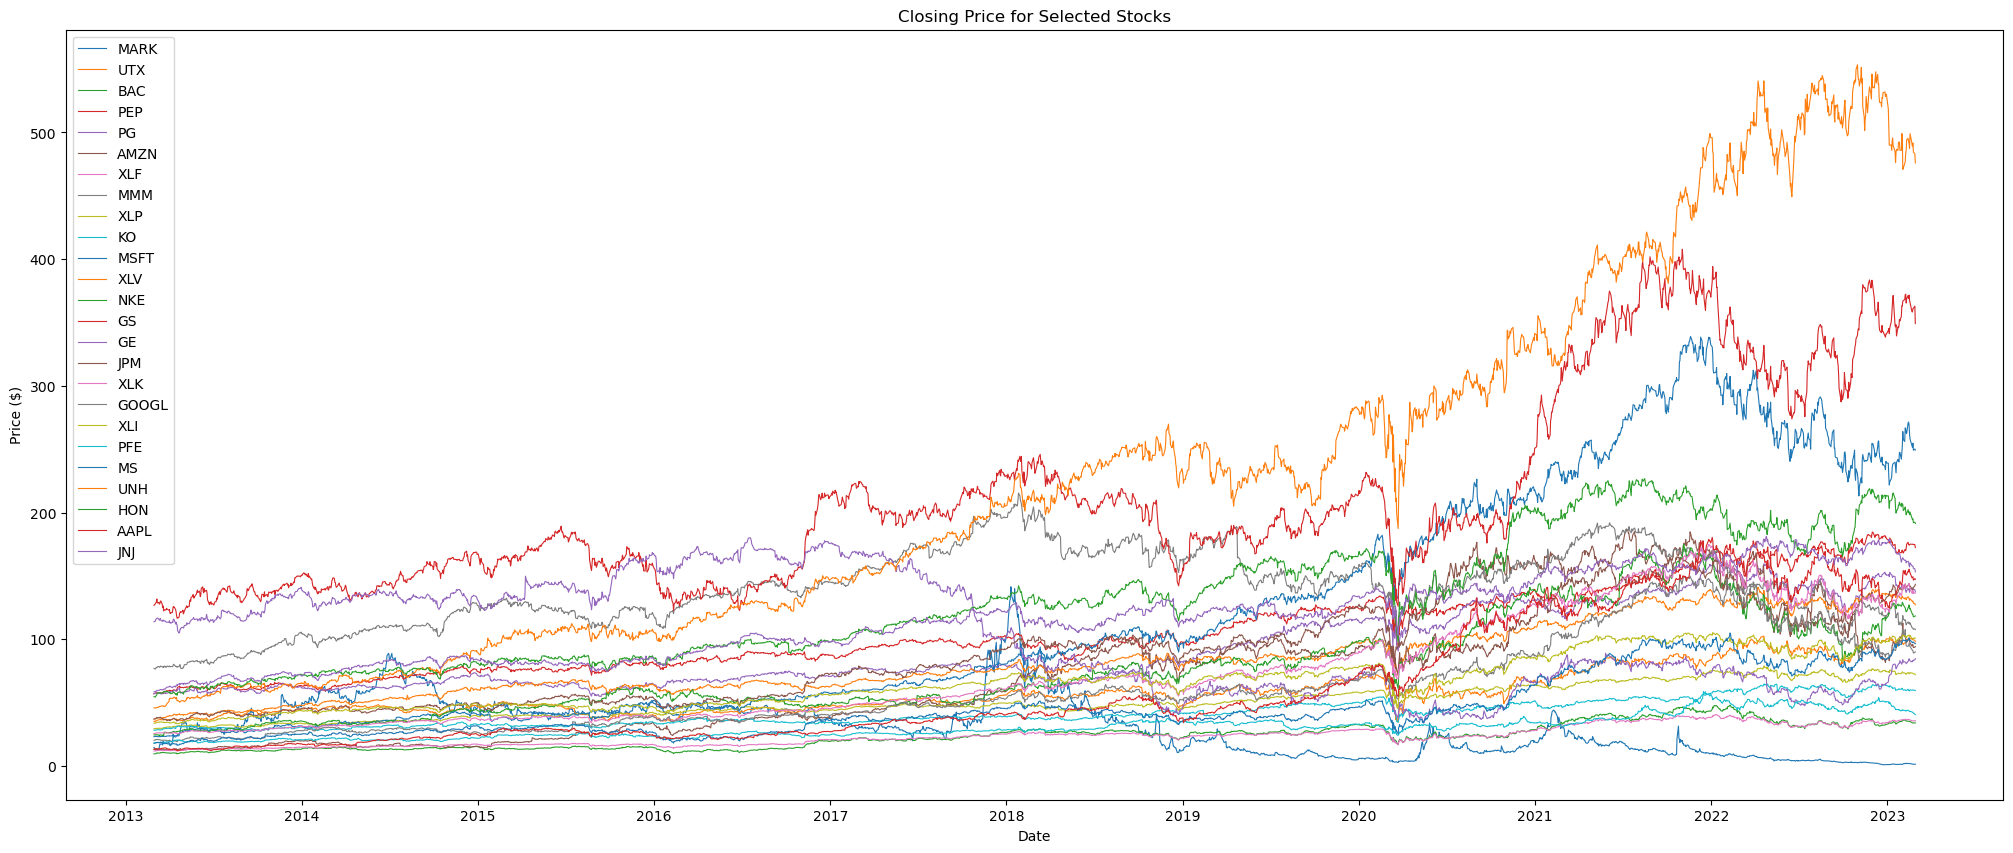

In [32]:
# Plot the closing price for each stock
plt.figure(figsize=(25, 10))
plt.plot(entire_adj_close, label=entire_adj_close.columns, linewidth=0.8)
plt.title('Closing Price for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

## 2.4 Lag of each stock

In [33]:
def lag(data, lags, symbol):
   ''' 
   Use to derive lag time series.
   Input:
   data: dataframe contains multiple time series 
   lags: up to number of lags to derive
   symbol: the column name in the dataframe of which time series to derive lag
   :returns: return a dataframe contains up to lags lag time series and N/A value of lags is filled with the most recent non N/A value. 
   '''
   lagged_data = pd.DataFrame()  # DataFrame to store lagged data
   for lag in range(1,lags+1):
        col_name = symbol + '_lag' + str(lag)
        lagged_data[col_name] = data[symbol].shift(lag)

   # Merge lagged data with original data
   #merged_data = pd.concat([df, lagged_data], axis=1)

   # Fill NA values backward
   lagged_data.fillna(method='bfill', inplace=True)

   # Print the first few rows of the merged data
   return lagged_data

In [34]:
lag(entire_adj_close, 5, 'AAPL')

,AAPL_lag1,AAPL_lag2,AAPL_lag3,AAPL_lag4,AAPL_lag5
timestamp,,,,,
2013-03-01,13.259694,13.259694,13.259694,13.259694,13.259694
2013-03-04,13.259694,13.259694,13.259694,13.259694,13.259694
2013-03-05,12.938729,13.259694,13.259694,13.259694,13.259694
2013-03-06,13.280455,12.938729,13.259694,13.259694,13.259694
2013-03-07,13.111594,13.280455,12.938729,13.259694,13.259694
...,...,...,...,...,...
2023-02-22,148.480000,152.550000,153.710000,155.330000,153.200000
2023-02-23,148.910000,148.480000,152.550000,153.710000,155.330000
2023-02-24,149.400000,148.910000,148.480000,152.550000,153.710000


In [115]:
lag(entire_adj_close, 5, 'MARK')

,MARK_lag1,MARK_lag2,MARK_lag3,MARK_lag4,MARK_lag5
timestamp,,,,,
2013-03-01,14.701,14.701,14.701,14.701,14.701
2013-03-04,14.701,14.701,14.701,14.701,14.701
2013-03-05,13.500,14.701,14.701,14.701,14.701
2013-03-06,12.600,13.500,14.701,14.701,14.701
2013-03-07,12.500,12.600,13.500,14.701,14.701
...,...,...,...,...,...
2023-02-22,1.580,1.900,1.970,2.020,1.905
2023-02-23,1.570,1.580,1.900,1.970,2.020
2023-02-24,1.415,1.570,1.580,1.900,1.970


# 3. Import predictor data
- #### 3.1 Import predictor data from endpoint
    - S&P 500
    - daily federal funds rate
    - daily US treasury yield
    - monthly total nonfarm payroll
    - monthly unemployment rate
    - monthly consumer price index (CPI)
- #### 3.2 Clean predictor data
- #### 3.3 Plot predictors

## 3.1 Import predictor data from endpoint

In [65]:
# SPY is the ticker symbol for the SPDR S&P 500 ETF. The S&P 500 is a stock market index that measures the performance of 500 large-cap publicly traded companies in the United States. 
sp500 = advantage_endpoint.stock_download(
    symbol='SPY',
    interval='daily',
    year_slice=None,  # Intraday
    adjusted=True
)
sp500 = sp500[['timestamp', 'adjusted_close']]
sp500

,timestamp,adjusted_close
0,2023-03-10,385.910000
1,2023-03-09,391.560000
2,2023-03-08,398.920000
3,2023-03-07,398.270000
4,2023-03-06,404.470000
...,...,...
5872,1999-11-05,90.068563
5873,1999-11-04,89.190712
5874,1999-11-03,88.517065
5875,1999-11-02,87.925016


In [66]:
# FEDERAL_FUNDS_RATE: daily federal funds rate (interest rate) of the United States.
FEDERAL_FUNDS_RATE = advantage_endpoint.econ_download(
        function = 'FEDERAL_FUNDS_RATE',
        interval ='daily'
)
FEDERAL_FUNDS_RATE

,timestamp,value
0,2023-03-08,4.57
1,2023-03-07,4.57
2,2023-03-06,4.57
3,2023-03-05,4.57
4,2023-03-04,4.57
...,...,...
25083,1954-07-05,0.88
25084,1954-07-04,1.25
25085,1954-07-03,1.25
25086,1954-07-02,1.25


In [68]:
# TREASURY_YIELD: daily US treasury yield of a given maturity timeline.
TREASURY_YIELD = advantage_endpoint.econ_download(
    function='TREASURY_YIELD',
    interval='daily',
    maturity='3month'
)
# drop the rows if treasury_yield = '.'
TREASURY_YIELD = TREASURY_YIELD[TREASURY_YIELD['value'] != '.']
TREASURY_YIELD

,timestamp,value
0,2023-03-08,5.06
1,2023-03-07,5.04
2,2023-03-06,4.93
3,2023-03-03,4.91
4,2023-03-02,4.91
...,...,...
10826,1981-09-08,16.54
10828,1981-09-04,16.64
10829,1981-09-03,16.96
10830,1981-09-02,16.65


In [70]:
# NONFARM_PAYROLL: monthly US All Employees: Total Nonfarm (commonly known as Total Nonfarm Payroll), a measure of the number of U.S. workers in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed.
NONFARM_PAYROLL = advantage_endpoint.econ_download(
    function='NONFARM_PAYROLL',
    interval='monthly'
)
# Convert the timestamp column to a pandas datetime object
NONFARM_PAYROLL['timestamp'] = pd.to_datetime(NONFARM_PAYROLL['timestamp'])
# Calculate the number of days in each month
NONFARM_PAYROLL['days_in_month'] = NONFARM_PAYROLL['timestamp'].dt.daysinmonth
# Calculate the daily payroll rate
NONFARM_PAYROLL['daily_nonfarm_payroll'] = NONFARM_PAYROLL['value'] / 30
NONFARM_PAYROLL

,timestamp,value,days_in_month,daily_nonfarm_payroll
0,2023-01-01,152844,31,5094.800000
1,2022-12-01,155349,31,5178.300000
2,2022-11-01,155642,30,5188.066667
3,2022-10-01,155041,31,5168.033333
4,2022-09-01,153809,30,5126.966667
...,...,...,...,...
1004,1939-05-01,30145,31,1004.833333
1005,1939-04-01,29786,30,992.866667
1006,1939-03-01,29804,31,993.466667
1007,1939-02-01,29394,28,979.800000


In [71]:
# Select the "timestamp" and "daily_payroll_rate" columns from df
NONFARM_PAYROLL = NONFARM_PAYROLL.loc[:, ['timestamp', 'value']]
NONFARM_PAYROLL

,timestamp,value
0,2023-01-01,152844
1,2022-12-01,155349
2,2022-11-01,155642
3,2022-10-01,155041
4,2022-09-01,153809
...,...,...
1004,1939-05-01,30145
1005,1939-04-01,29786
1006,1939-03-01,29804
1007,1939-02-01,29394


In [72]:
# UNEMPLOYMENT: monthly unemployment data of the United States. The unemployment rate represents the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces (source).
UNEMPLOYMENT = advantage_endpoint.econ_download(
    function='UNEMPLOYMENT',
    interval='monthly'
)
UNEMPLOYMENT

,timestamp,value
0,2023-01-01,3.4
1,2022-12-01,3.5
2,2022-11-01,3.6
3,2022-10-01,3.7
4,2022-09-01,3.5
...,...,...
896,1948-05-01,3.5
897,1948-04-01,3.9
898,1948-03-01,4.0
899,1948-02-01,3.8


In [73]:
# CPI: monthly and semiannual consumer price index (CPI) of the United States. CPI is widely regarded as the barometer of inflation levels in the broader economy.
CPI = advantage_endpoint.econ_download(
    function='CPI',
    interval='monthly'
)
CPI

,timestamp,value
0,2023-01-01,299.170
1,2022-12-01,296.797
2,2022-11-01,297.711
3,2022-10-01,298.012
4,2022-09-01,296.808
...,...,...
1316,1913-05-01,9.700
1317,1913-04-01,9.800
1318,1913-03-01,9.800
1319,1913-02-01,9.800


## 3.2 Clean predictor data

In [74]:
def manipulate(predictor_df, predictor):
    # convert the 'date' column to datetime64
    predictor_df['timestamp'] = pd.to_datetime(predictor_df['timestamp'], format='%Y-%m-%d')
    # rename value to a specific predictor 
    predictor_df = predictor_df.rename(columns={'value': predictor.lower()})
    predictor_df = predictor_df.rename(columns={'adjusted_close': predictor.lower()})
    # Left join the predictor with df_dates
    daily_predictor_df = df_dates.merge(predictor_df, how='left', on='timestamp')
    # Forward fill NA
    daily_predictor_df.fillna(method='ffill', inplace=True)
    return daily_predictor_df

In [75]:
daily_SP500 = manipulate(sp500, 'SPY')
daily_FEDERAL_FUNDS_RATE = manipulate(FEDERAL_FUNDS_RATE, 'FEDERAL_FUNDS_RATE')
daily_TREASURY_YIELD = manipulate(TREASURY_YIELD, 'TREASURY_YIELD')
daily_NONFARM_PAYROLL = manipulate(NONFARM_PAYROLL, 'NONFARM_PAYROLL')
daily_UNEMPLOYMENT = manipulate(UNEMPLOYMENT, 'UNEMPLOYMENT')
daily_CPI = manipulate(CPI, 'CPI')

In [86]:
# Merge predictors
dfs = [daily_SP500, daily_FEDERAL_FUNDS_RATE, daily_TREASURY_YIELD, daily_NONFARM_PAYROLL, daily_UNEMPLOYMENT, daily_CPI]

predictors_df = pd.concat([df.set_index('timestamp') for df in dfs], axis=1, join='outer')
predictors_df['treasury_yield'] = predictors_df['treasury_yield'].astype(float)
predictors_df

,spy,federal_funds_rate,treasury_yield,nonfarm_payroll,unemployment,cpi
timestamp,,,,,,
2013-03-01,126.235770,0.14,0.11,134901.0,7.5,232.773
2013-03-02,126.235770,0.14,0.11,134901.0,7.5,232.773
2013-03-03,126.235770,0.14,0.11,134901.0,7.5,232.773
2013-03-04,126.907987,0.16,0.11,134901.0,7.5,232.773
2013-03-05,128.044947,0.15,0.08,134901.0,7.5,232.773
...,...,...,...,...,...,...
2023-02-24,396.380000,4.58,4.86,152844.0,3.4,299.170
2023-02-25,396.380000,4.58,4.86,152844.0,3.4,299.170
2023-02-26,396.380000,4.58,4.86,152844.0,3.4,299.170


In [87]:
# Count missing values in each column
print(predictors_df.isna().sum())

spy                   0
federal_funds_rate    0
treasury_yield        0
nonfarm_payroll       0
unemployment          0
cpi                   0
dtype: int64


## 3.3 Plot predictors

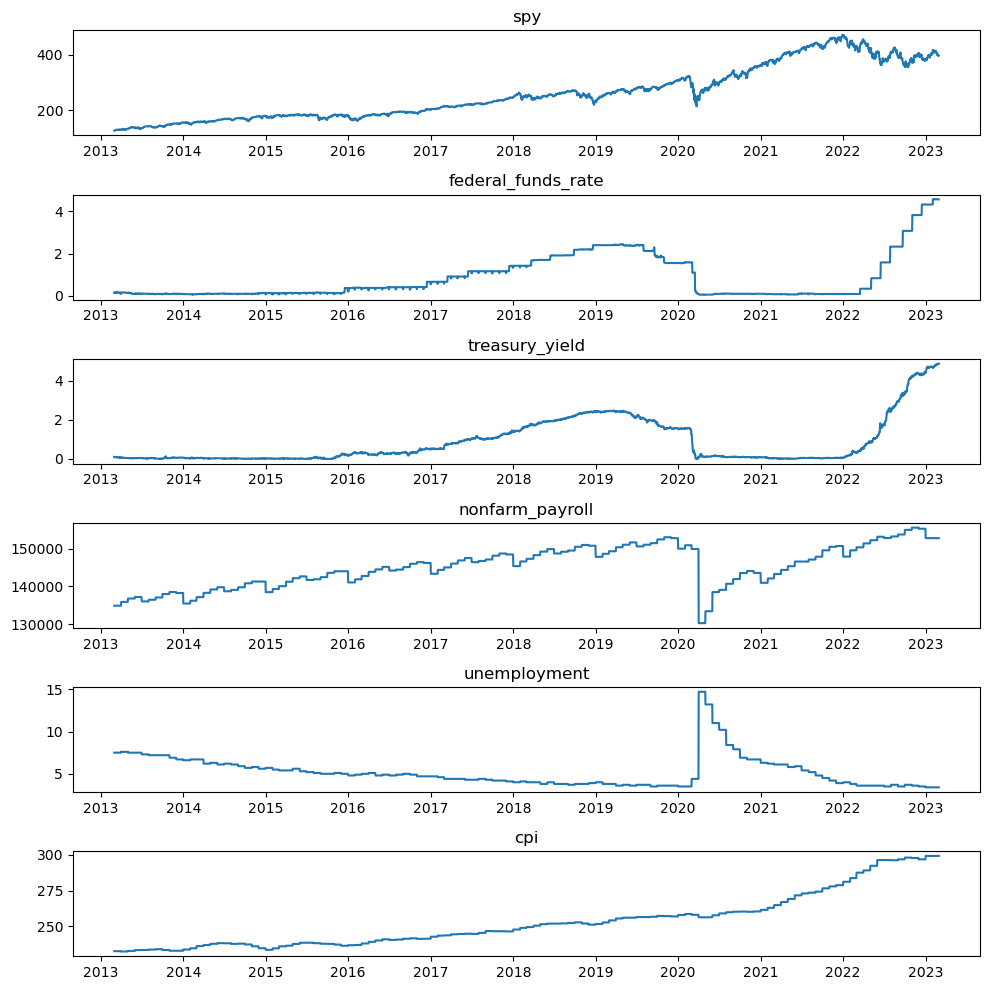

In [88]:
# Create the figure and subplots
fig, axs = plt.subplots(6, 1, figsize=(10, 10))

# Plot each figure on a separate subplot
predictor = predictors_df.columns
for i, p in enumerate(predictor):
    axs[i].plot(predictors_df[predictor[i]])
    axs[i].set_title(p)
plt.tight_layout()
plt.show()


In [80]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_df_scaled = scaler.fit_transform(merged_df)

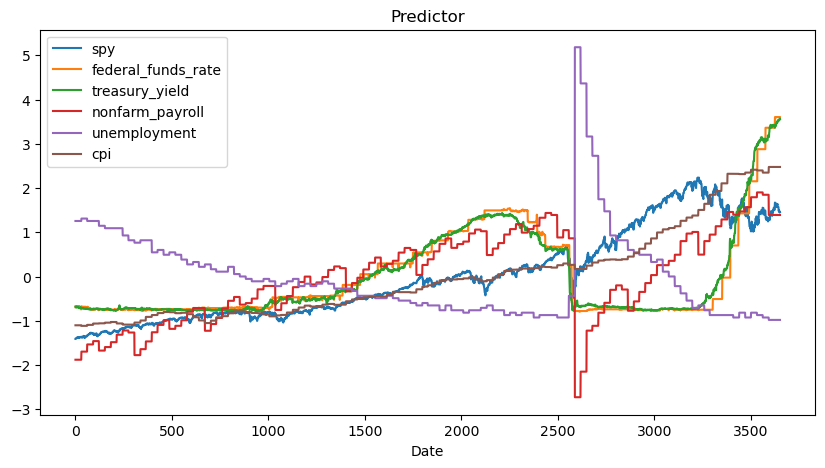

In [81]:
# Plot the closing price for each stock
plt.figure(figsize=(10, 5))
plt.plot(merged_df_scaled, label= merged_df.columns)
plt.title('Predictor')
plt.xlabel('Date')
plt.legend()
plt.show()

# 4. Prepare input data

In [107]:
stock = pd.DataFrame(entire_adj_close['AAPL'])
lag_df = lag(entire_adj_close, 5, 'AAPL')
combined = stock.join(lag_df, how='left').join(predictors_df, how='left')
combined

,AAPL,AAPL_lag1,AAPL_lag2,AAPL_lag3,AAPL_lag4,AAPL_lag5,spy,federal_funds_rate,treasury_yield,nonfarm_payroll,unemployment,cpi
timestamp,,,,,,,,,,,,
2013-03-01,13.259694,13.259694,13.259694,13.259694,13.259694,13.259694,126.235770,0.14,0.11,134901.0,7.5,232.773
2013-03-04,12.938729,13.259694,13.259694,13.259694,13.259694,13.259694,126.907987,0.16,0.11,134901.0,7.5,232.773
2013-03-05,13.280455,12.938729,13.259694,13.259694,13.259694,13.259694,128.044947,0.15,0.08,134901.0,7.5,232.773
2013-03-06,13.111594,13.280455,12.938729,13.259694,13.259694,13.259694,128.219226,0.15,0.10,134901.0,7.5,232.773
2013-03-07,13.263144,13.111594,13.280455,12.938729,13.259694,13.259694,128.451597,0.16,0.10,134901.0,7.5,232.773
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,148.910000,148.480000,152.550000,153.710000,155.330000,153.200000,398.540000,4.58,4.84,152844.0,3.4,299.170
2023-02-23,149.400000,148.910000,148.480000,152.550000,153.710000,155.330000,400.660000,4.58,4.84,152844.0,3.4,299.170
2023-02-24,146.710000,149.400000,148.910000,148.480000,152.550000,153.710000,396.380000,4.58,4.86,152844.0,3.4,299.170


In [123]:
def create_input_data(data, lags):
    input=[]
    for i in data.columns:
        stock = pd.DataFrame(data[i])
        lag_df = lag(data, lags, i)
        combined = stock.join(lag_df, how='left').join(predictors_df, how='left')
        input.append(np.array(combined))
    return np.array(input)

In [125]:
input_data = create_input_data(entire_adj_close, 5)
input_data

array([[[1.47010000e+01, 1.47010000e+01, 1.47010000e+01, ...,
         1.34901000e+05, 7.50000000e+00, 2.32773000e+02],
        [1.35000000e+01, 1.47010000e+01, 1.47010000e+01, ...,
         1.34901000e+05, 7.50000000e+00, 2.32773000e+02],
        [1.26000000e+01, 1.35000000e+01, 1.47010000e+01, ...,
         1.34901000e+05, 7.50000000e+00, 2.32773000e+02],
        ...,
        [1.38000000e+00, 1.41500000e+00, 1.57000000e+00, ...,
         1.52844000e+05, 3.40000000e+00, 2.99170000e+02],
        [1.36000000e+00, 1.38000000e+00, 1.41500000e+00, ...,
         1.52844000e+05, 3.40000000e+00, 2.99170000e+02],
        [1.40000000e+00, 1.36000000e+00, 1.38000000e+00, ...,
         1.52844000e+05, 3.40000000e+00, 2.99170000e+02]],

       [[3.53917115e+01, 3.53917115e+01, 3.53917115e+01, ...,
         1.34901000e+05, 7.50000000e+00, 2.32773000e+02],
        [3.49990375e+01, 3.53917115e+01, 3.53917115e+01, ...,
         1.34901000e+05, 7.50000000e+00, 2.32773000e+02],
        [3.57411914e+01, 

In [126]:
entire_adj_close.columns

Index(['MARK', 'UTX', 'BAC', 'PEP', 'PG', 'AMZN', 'XLF', 'MMM', 'XLP', 'KO',
       'MSFT', 'XLV', 'NKE', 'GS', 'GE', 'JPM', 'XLK', 'GOOGL', 'XLI', 'PFE',
       'MS', 'UNH', 'HON', 'AAPL', 'JNJ'],
      dtype='object')